In [1]:
from sklearn.datasets import make_blobs

# import pandas
import pandas as pd
# import Kmeans 
from sklearn.cluster import KMeans
# import numpy
import numpy as np
# import matplotlib
import matplotlib.pyplot as plt


from sklearn import metrics
from sklearn.preprocessing import StandardScaler


# aglomerative clustering
from sklearn.cluster import AgglomerativeClustering
# cluster hierarchy
import scipy.cluster.hierarchy as sch


# set figure size
plt.rcParams["figure.figsize"] = (12,8)

In [2]:
# Generate clusters 
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  random_state=0)


def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

In [3]:
# create an object
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 3)

In [4]:
#ward: minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and, in this sense, is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.

#maximum: or complete linkage minimizes the maximum distance between observations of pairs of clusters.

#average: linkage minimizes the average of the distances between all observations of pairs of clusters.

#single: linkage minimizes the distance between the closest observations of pairs of clusters.

In [5]:
# fit and predict
y_hc = ac.fit_predict(X)
y_hc

array([1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 1,
       0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1,
       1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2,
       2, 1, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0,
       2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1])

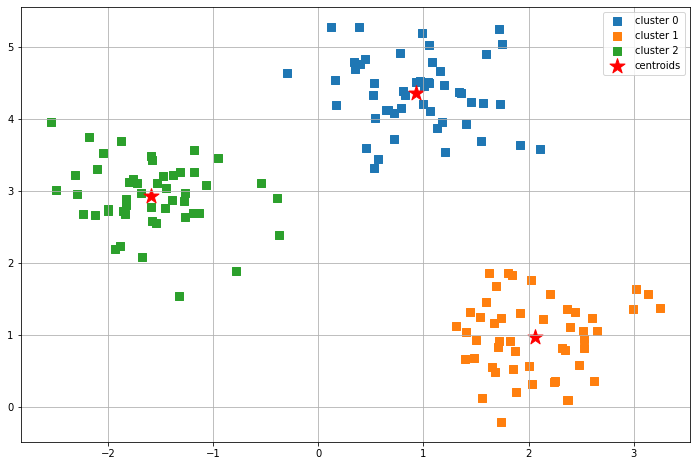

In [6]:
# Plot clustering result
plot_clusters(X,y_hc, True)

In [9]:
# define plot_dendrogram function
def plot_dendrogram(X,method ='ward'):
    fig, ax = plt.subplots(figsize=(12,8))
    sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

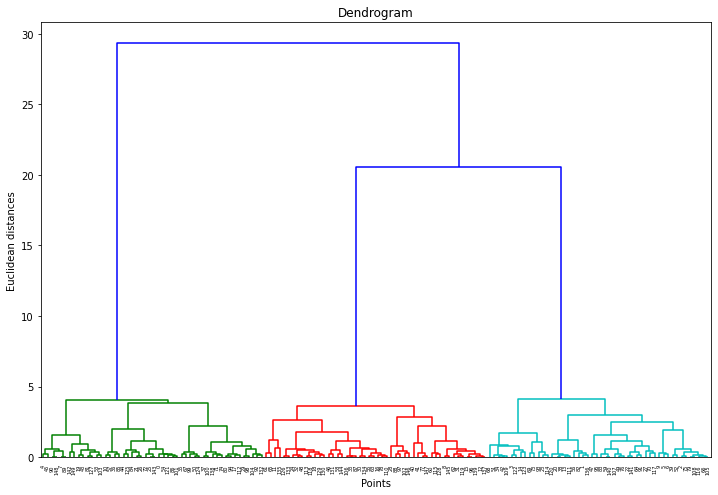

In [10]:
# Plot dendrogram
plot_dendrogram(X)